In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #vẽ biểu
from sklearn.preprocessing import MinMaxScaler #chuẩn hóa dữ liệu
from sklearn.linear_model import LinearRegression
df = pd.read_csv('FinalData.csv')
df.head()

,ID,Severity,Start_Time,Distance(mi),Street,City,Country,State,Airport_Code,Temperature(F),...,Bump,Crossing,Junction,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Unnamed: 24
0,A-4694324,2,12/3/2022,0.056,Forest Ridge Dr,Sterling,US,VA,KIAD,45,...,False,False,False,False,False,False,False,False,False,2
1,A-5006183,2,8/20/2022,0.022,Floradale Ave,Lompoc,US,CA,KLPC,68,...,False,False,False,False,False,False,False,False,True,2
2,A-4237356,2,2/21/2022,1.054,14th St NW,Austin,US,MN,KAUM,27,...,False,False,False,False,False,False,False,False,False,2
3,A-4222549,2,10/12/2022,0.038,Preston Rd,Dallas,US,TX,KDAL,91,...,False,False,False,False,False,True,False,False,False,2
4,A-4908440,2,2/1/2022,2.091,I-90 W,Saint Regis,US,MT,K3TH,13,...,False,False,False,False,False,False,False,False,False,2


In [13]:
df = df.replace({True: 1, False: 0})

In [14]:
df

,ID,Severity,Start_Time,Distance(mi),Street,City,Country,State,Airport_Code,Temperature(F),...,Bump,Crossing,Junction,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Unnamed: 24
0,A-4694324,2,12/3/2022,0.056,Forest Ridge Dr,Sterling,US,VA,KIAD,45,...,0,0,0,0,0,0,0,0,0,2
1,A-5006183,2,8/20/2022,0.022,Floradale Ave,Lompoc,US,CA,KLPC,68,...,0,0,0,0,0,0,0,0,1,2
2,A-4237356,2,2/21/2022,1.054,14th St NW,Austin,US,MN,KAUM,27,...,0,0,0,0,0,0,0,0,0,2
3,A-4222549,2,10/12/2022,0.038,Preston Rd,Dallas,US,TX,KDAL,91,...,0,0,0,0,0,1,0,0,0,2
4,A-4908440,2,2/1/2022,2.091,I-90 W,Saint Regis,US,MT,K3TH,13,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21240,A-4450026,2,2/8/2022,0.105,Norwalk Blvd,Whittier,US,CA,KEMT,69,...,0,0,0,0,0,0,0,0,0,2
21241,A-5125363,2,4/19/2022,0.892,I-96 W,Novi,US,MI,KPTK,37,...,0,0,0,0,0,0,0,0,0,2
21242,A-3857834,2,1/27/2022,0.110,N John Young Pkwy,Orlando,US,FL,KORL,65,...,0,0,0,0,0,0,0,0,0,2
21243,A-3907877,2,1/8/2022,0.751,N Northern Way,York,US,PA,KTHV,23,...,0,0,0,0,0,0,0,0,1,2


In [15]:
numeric_cols = df.select_dtypes (include=['int', 'float']).columns
stats = df[numeric_cols].describe().T
for col in df [numeric_cols].columns:stats.loc[col, 'mode'] = df[col].mode()[0]
for col in df [numeric_cols].columns: stats.loc[col, 'range'] = df[col].max() - df[col].min()
for col in df[numeric_cols].columns: stats.loc[col, 'variance'] = df[col].var()

In [16]:
stats

,count,mean,std,min,25%,50%,75%,max,mode,range,variance
Severity,21245.0,2.054130,0.324555,2.0,2.0,2.000,2.000,4.000,2.000,2.000,0.105336
Distance(mi),21245.0,1.017216,2.061606,0.0,0.1,0.357,1.059,77.555,0.009,77.555,4.250218
Temperature(F),21245.0,61.191622,20.089900,-27.0,48.0,64.000,77.000,140.000,73.000,167.000,403.604072
Visibility(mi),21245.0,9.060979,2.503397,0.0,10.0,10.000,10.000,80.000,10.000,80.000,6.266998
Wind_Speed(mph),21245.0,7.841469,5.589871,0.0,5.0,7.000,12.000,51.000,0.000,51.000,31.246661
Precipitation(in),21245.0,0.005651,0.039927,0.0,0.0,0.000,0.000,1.460,0.000,1.460,0.001594
Bump,21245.0,0.000424,0.020578,0.0,0.0,0.000,0.000,1.000,0.000,1.000,0.000423
Crossing,21245.0,0.087126,0.282027,0.0,0.0,0.000,0.000,1.000,0.000,1.000,0.079539
Junction,21245.0,0.067875,0.251537,0.0,0.0,0.000,0.000,1.000,0.000,1.000,0.063271
Railway,21245.0,0.006778,0.082051,0.0,0.0,0.000,0.000,1.000,0.000,1.000,0.006732


In [17]:
import plotly.graph_objects as go
state_counts = df["State"].value_counts()
fig = go.Figure(data=go.Choropleth(
    locations=state_counts.index,
    z=state_counts.values.astype(float),
    locationmode="USA-states",
))
fig.update_layout(title_text="Số lượng tai nạn giao thông trên mỗi ban ở Mỹ ",geo_scope="usa")
fig.show()

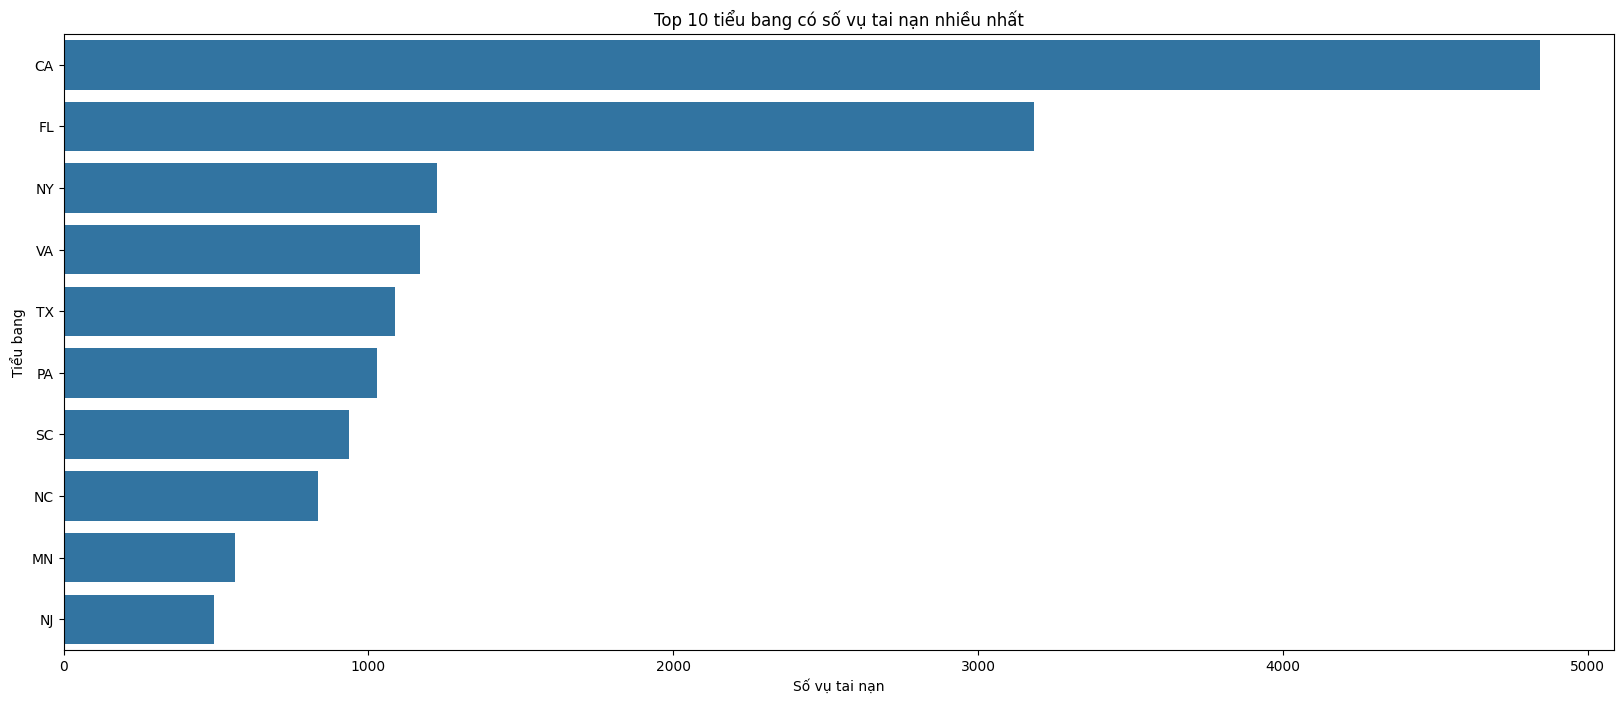

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 8))
plt.title("Top 10 tiểu bang có số vụ tai nạn nhiều nhất")
sns.barplot(x=state_counts[:10].values, y=state_counts[:10].index, orient="h")
plt.xlabel("Số vụ tai nạn")
plt.ylabel("Tiểu bang")
plt.show()


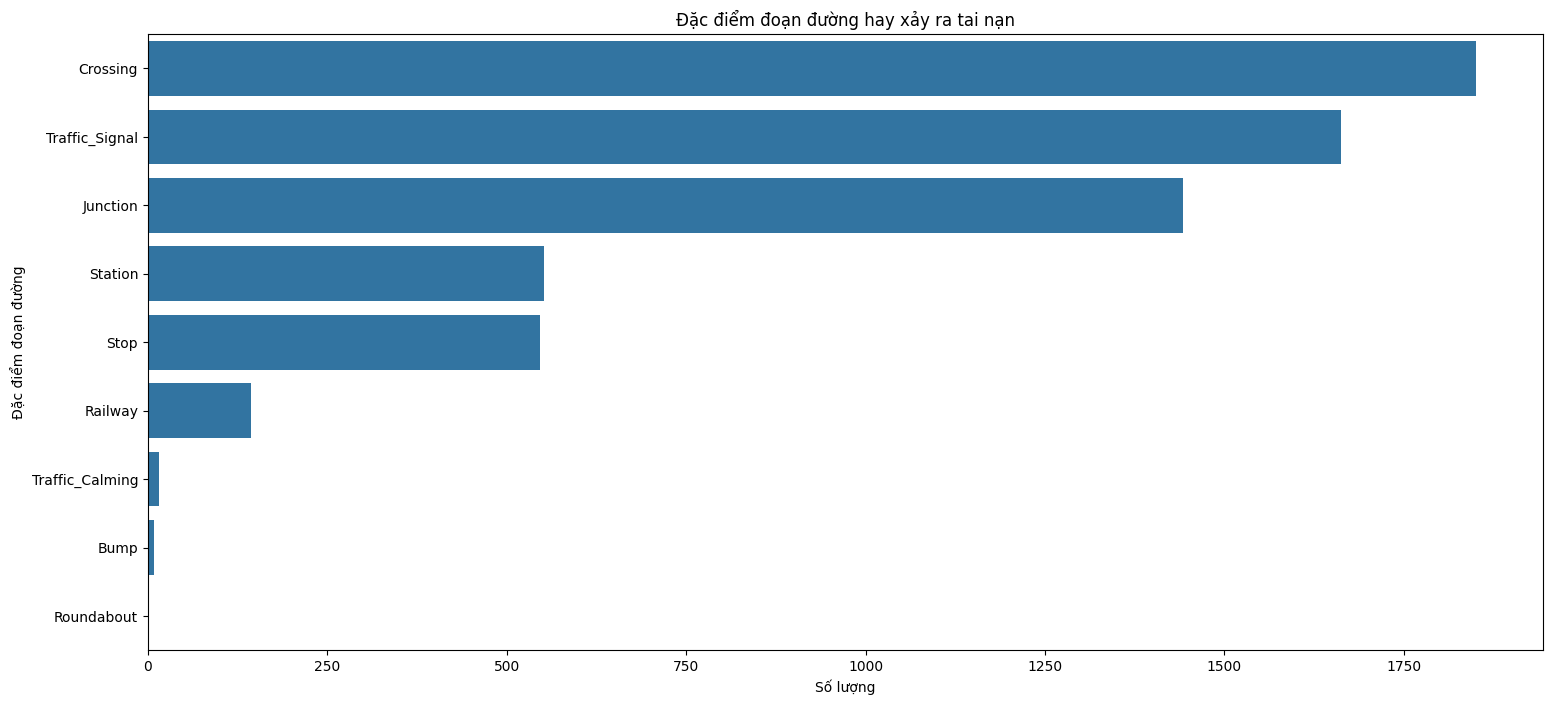

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of road features
road_features = ["Bump", "Crossing", "Junction",
                 "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming",
                 "Traffic_Signal"]

# Calculate the sum of each road feature
data = df[road_features].sum().sort_values(ascending=False)
plt.figure(figsize=(18, 8))
plt.title("Đặc điểm đoạn đường hay xảy ra tai nạn")
sns.barplot(x=data.values, y=data.index, orient="h")
plt.xlabel("Số lượng")
plt.ylabel("Đặc điểm đoạn đường")
plt.show()


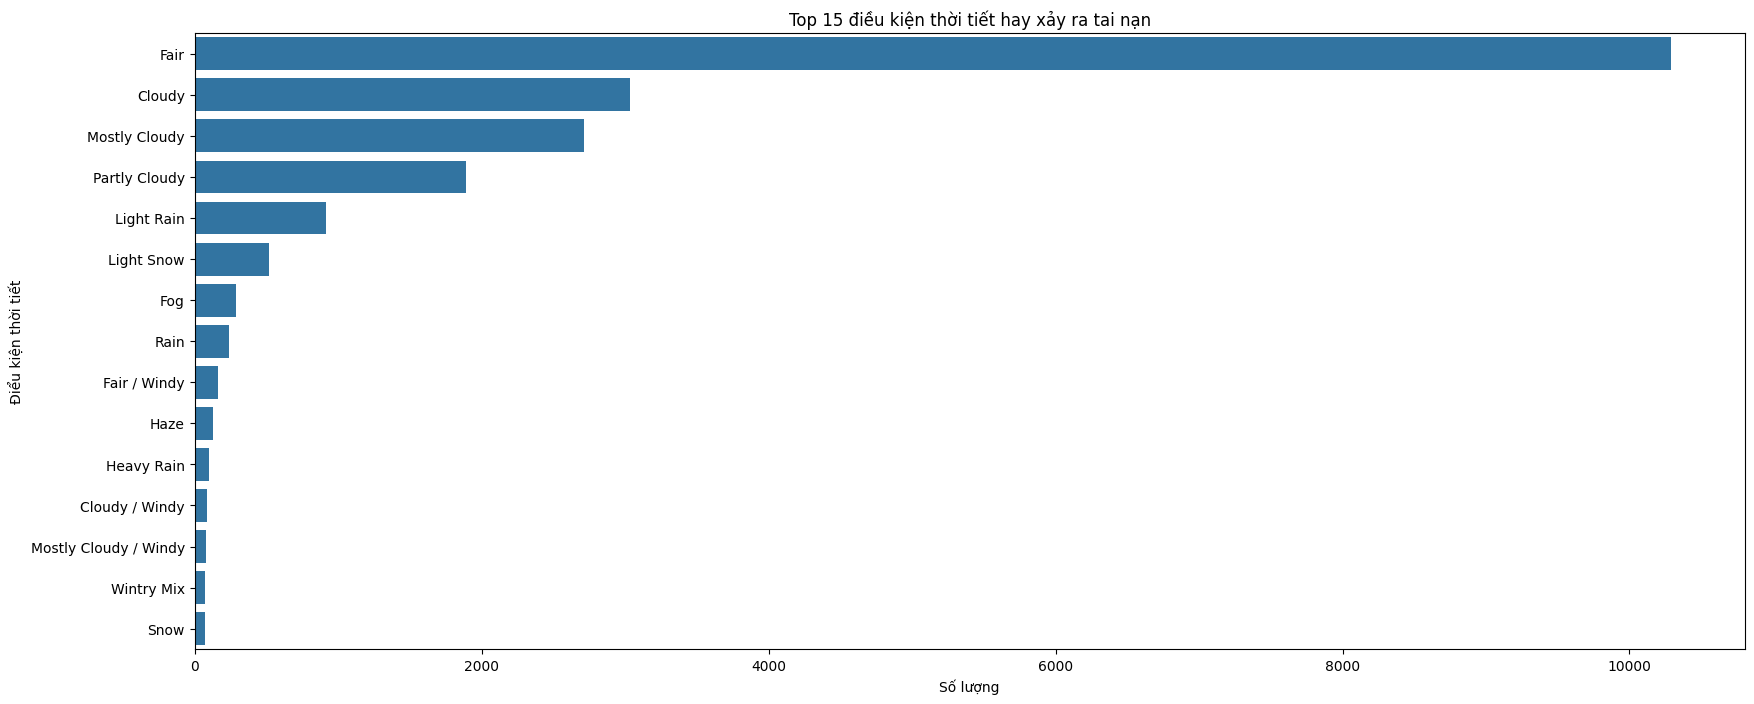

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
counts = df["Weather_Condition"].value_counts()[:15]
plt.figure(figsize=(20, 8))
plt.title("Top 15 điều kiện thời tiết hay xảy ra tai nạn")
sns.barplot(x=counts.values, y=counts.index)
plt.xlabel("Số lượng")
plt.ylabel("Điểu kiện thời tiết")
plt.show()

In [21]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"])

# Trích xuất năm, tháng, ngày trong tuần và ngày từ "Start_Time"
df["Year"] = df["Start_Time"].dt.year
df["Month"] = df["Start_Time"].dt.month
df["Weekday"] = df["Start_Time"].dt.weekday
df["Day"] = df["Start_Time"].dt.day

# Trích xuất giờ và phút từ "Start_Time"
df["Hour"] = df["Start_Time"].dt.hour
df["Minute"] = df["Start_Time"].dt.minute

In [22]:
df.head()

,ID,Severity,Start_Time,Distance(mi),Street,City,Country,State,Airport_Code,Temperature(F),...,Stop,Traffic_Calming,Traffic_Signal,Unnamed: 24,Year,Month,Weekday,Day,Hour,Minute
0,A-4694324,2,2022-12-03,0.056,Forest Ridge Dr,Sterling,US,VA,KIAD,45,...,0,0,0,2,2022,12,5,3,0,0
1,A-5006183,2,2022-08-20,0.022,Floradale Ave,Lompoc,US,CA,KLPC,68,...,0,0,1,2,2022,8,5,20,0,0
2,A-4237356,2,2022-02-21,1.054,14th St NW,Austin,US,MN,KAUM,27,...,0,0,0,2,2022,2,0,21,0,0
3,A-4222549,2,2022-10-12,0.038,Preston Rd,Dallas,US,TX,KDAL,91,...,0,0,0,2,2022,10,2,12,0,0
4,A-4908440,2,2022-02-01,2.091,I-90 W,Saint Regis,US,MT,K3TH,13,...,0,0,0,2,2022,2,1,1,0,0


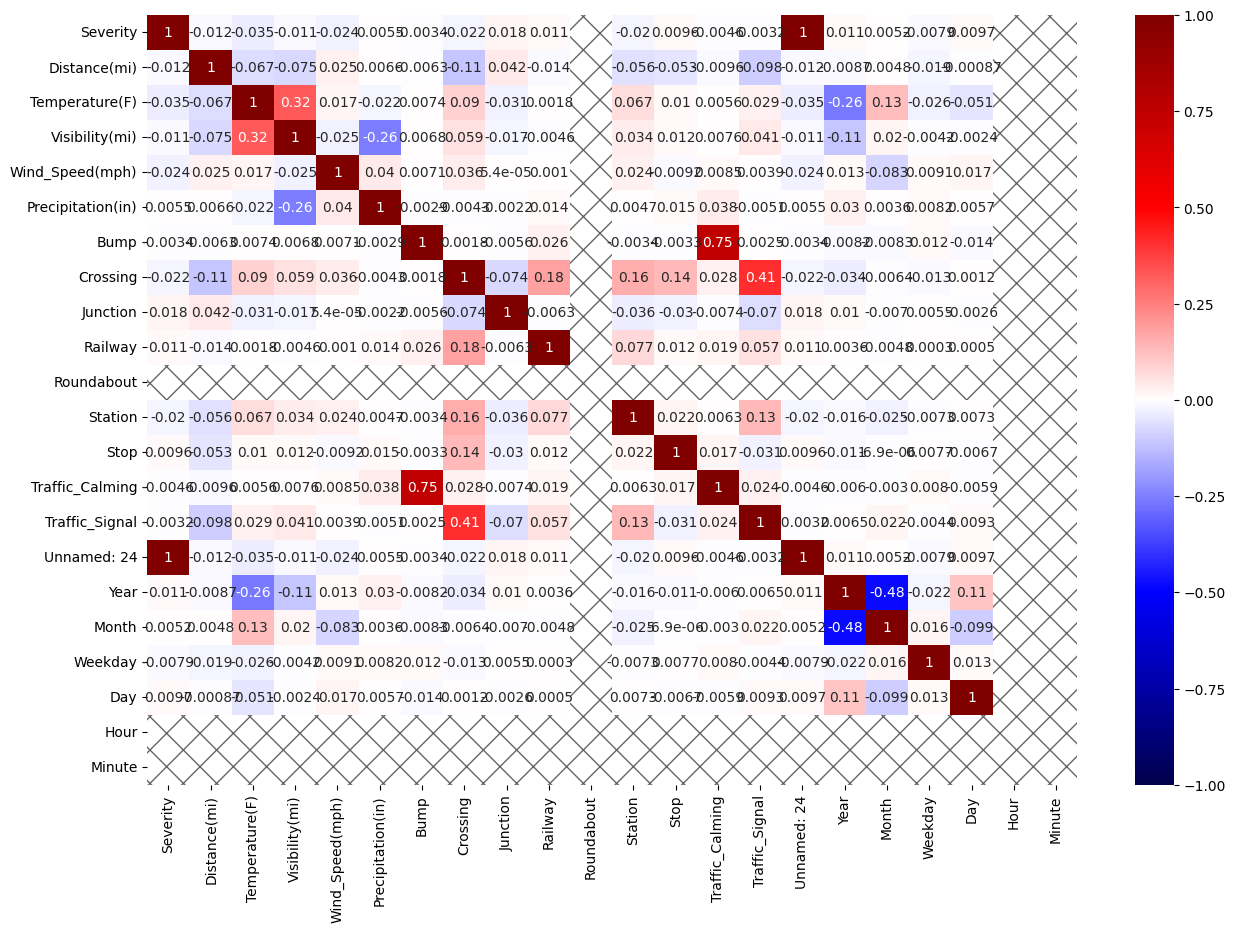

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing data
numeric_df = df.select_dtypes(include='number')  # Select only numeric columns

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="seismic", annot=True)

# Customize plot background
plt.gca().patch.set_hatch("x")
plt.gca().patch.set_edgecolor("#666")

plt.show()


# KNN

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# Giả sử df là DataFrame ban đầu với dữ liệu
# Chọn các cột đặc trưng và cột mục tiêu từ DataFrame
dataset = df[["Severity", "Visibility(mi)", "Temperature(F)", "Wind_Speed(mph)", "Precipitation(in)", "Bump", "Traffic_Calming", "Traffic_Signal"]]


In [25]:
dataset

,Severity,Visibility(mi),Temperature(F),Wind_Speed(mph),Precipitation(in),Bump,Traffic_Calming,Traffic_Signal
0,2,10.0,45,5,0.0,0,0,0
1,2,10.0,68,13,0.0,0,0,1
2,2,10.0,27,15,0.0,0,0,0
3,2,10.0,91,7,0.0,0,0,0
4,2,10.0,13,3,0.0,0,0,0
...,...,...,...,...,...,...,...,...
21240,2,10.0,69,5,0.0,0,0,0
21241,2,9.0,37,17,0.0,0,0,0
21242,2,10.0,65,13,0.0,0,0,0
21243,2,10.0,23,5,0.0,0,0,1


In [26]:
# Kiểm tra độ dài và xem các hàng đầu tiên của dataset
print(len(dataset))
print(dataset.head())

21245
   Severity  Visibility(mi)  Temperature(F)  Wind_Speed(mph)  \
0         2            10.0              45                5   
1         2            10.0              68               13   
2         2            10.0              27               15   
3         2            10.0              91                7   
4         2            10.0              13                3   

   Precipitation(in)  Bump  Traffic_Calming  Traffic_Signal  
0                0.0     0                0               0  
1                0.0     0                0               1  
2                0.0     0                0               0  
3                0.0     0                0               0  
4                0.0     0                0               0  


In [27]:
# Chia dataset thành X và y
X = dataset[["Visibility(mi)", "Temperature(F)", "Wind_Speed(mph)", "Precipitation(in)", "Bump", "Traffic_Calming", "Traffic_Signal"]]
y = dataset["Severity"]

In [28]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [29]:
# In kích thước của các tập dữ liệu
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

16996
16996
4249
4249


In [30]:
# Chuẩn hóa các đặc trưng
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [31]:
# Định nghĩa mô hình K-NN
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')

In [32]:
# Huấn luyện mô hình
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [33]:
# Dự đoán kết quả trên tập kiểm tra
y_pred = classifier.predict(X_test)

In [34]:
print(y_pred)

[2 2 2 ... 2 2 2]


In [35]:
y_test

18474    2
624      2
4793     2
6297     2
5527     2
        ..
13057    2
1336     2
6046     2
19425    2
8423     2
Name: Severity, Length: 4249, dtype: int64

In [36]:
# Đánh giá mô hình
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_test, y_pred))


[[4133    5]
 [ 111    0]]
0.9603985588367279
0.9726994586961638


In [37]:
# Tạo DataFrame chứa X_test, y_test và y_pred
X_test_df = pd.DataFrame(X_test, columns=["Visibility(mi)", "Temperature(F)", "Wind_Speed(mph)", "Precipitation(in)", "Bump", "Traffic_Calming", "Traffic_Signal"])
y_test_df = pd.DataFrame(y_test.reset_index(drop=True), columns=["Actual_Severity"])  # Đặt lại chỉ mục để tránh vấn đề khi gộp
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Severity"])

# Gộp X_test_df, y_test_df và y_pred_df thành một DataFrame duy nhất
result_df = pd.concat([X_test_df, y_test_df, y_pred_df], axis=1)

# Xuất DataFrame thành file CSV
result_df.to_csv('predicted_results.csv', index=False)

# Decion Tree

Decision Tree Classifier:
Confusion Matrix:
 [[4098   40]
 [ 110    1]]
F1 Score: 0.9567167733982425
Accuracy Score: 0.9646975759002118


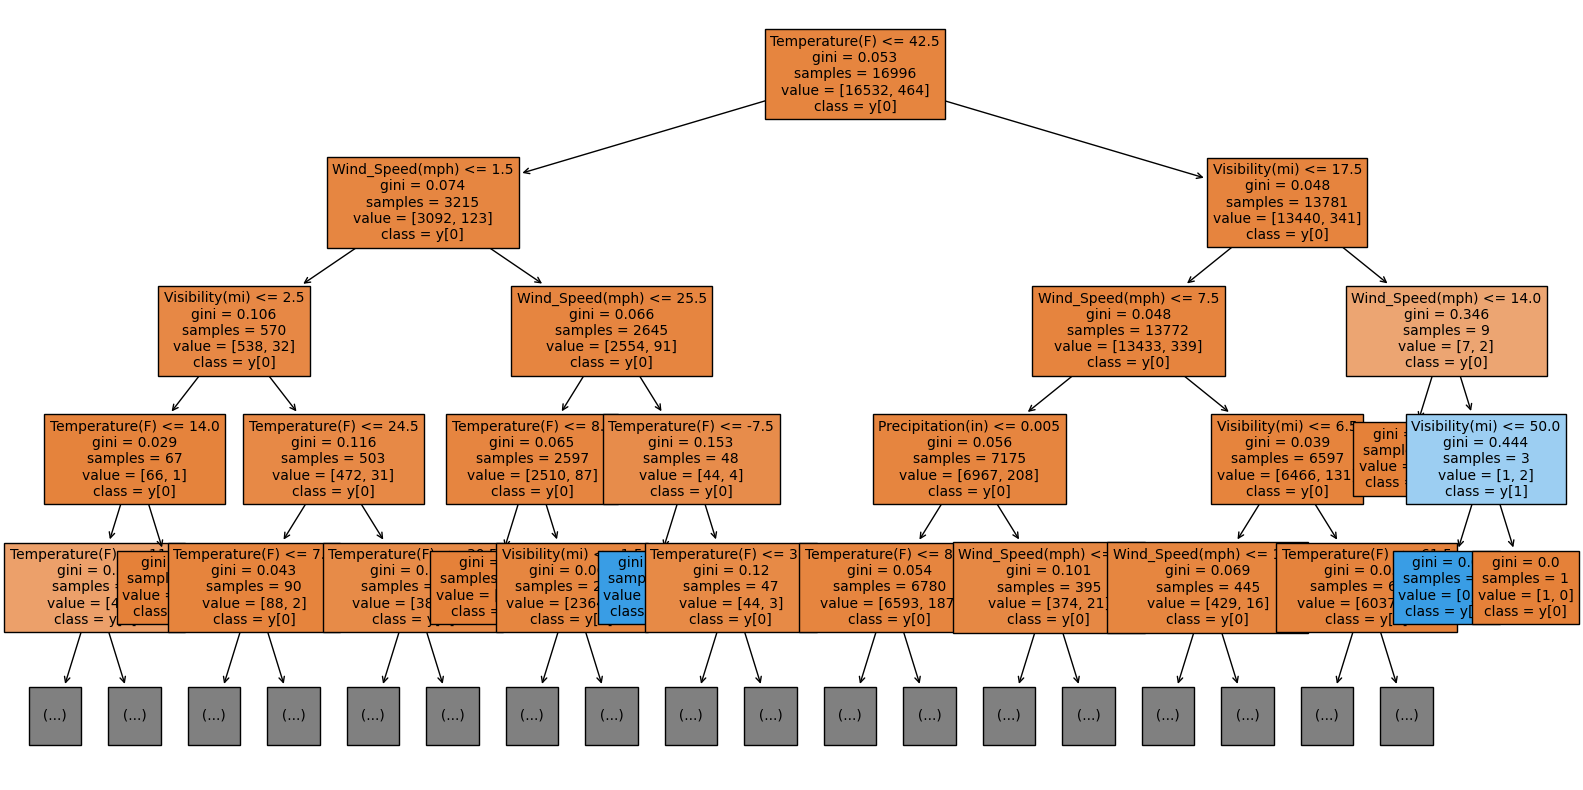

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Assuming df is already defined
# df = pd.read_csv('path_to_your_file.csv')

# Chọn các cột đặc trưng và cột mục tiêu từ DataFrame
dataset = df[["Severity", "Visibility(mi)", "Temperature(F)", "Wind_Speed(mph)", "Precipitation(in)", "Bump", "Traffic_Calming", "Traffic_Signal"]]

# Chia dataset thành X và y
X = dataset[["Visibility(mi)", "Temperature(F)", "Wind_Speed(mph)", "Precipitation(in)", "Bump", "Traffic_Calming", "Traffic_Signal"]]
y = dataset["Severity"]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# Chuẩn hóa các đặc trưng nếu cần (ví dụ cho RandomForestClassifier)
sc_X = StandardScaler()
X_train_rf = sc_X.fit_transform(X_train)
X_test_rf = sc_X.transform(X_test)

# Định nghĩa và huấn luyện mô hình DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train, y_train)

# Dự đoán kết quả trên tập kiểm tra cho DecisionTreeClassifier
y_pred_dt = dt_classifier.predict(X_test)

# Đánh giá mô hình DecisionTreeClassifier
dt_cm = confusion_matrix(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')
dt_accuracy = accuracy_score(y_test, y_pred_dt)

print("Decision Tree Classifier:")
print("Confusion Matrix:\n", dt_cm)
print("F1 Score:", dt_f1)
print("Accuracy Score:", dt_accuracy)

# Plot the Decision Tree
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(dt_classifier, max_depth=4, fontsize=10, feature_names=X_train.columns.to_list(), class_names=True, filled=True, ax=ax)
plt.show()


In [39]:
y_pred_dt

array([2, 2, 2, ..., 2, 2, 2])

# Random Forest

Random Forest Classifier:
Confusion Matrix:
 [[4130    8]
 [ 111    0]]
F1 Score: 0.9600450486851003
Accuracy Score: 0.9719934102141681




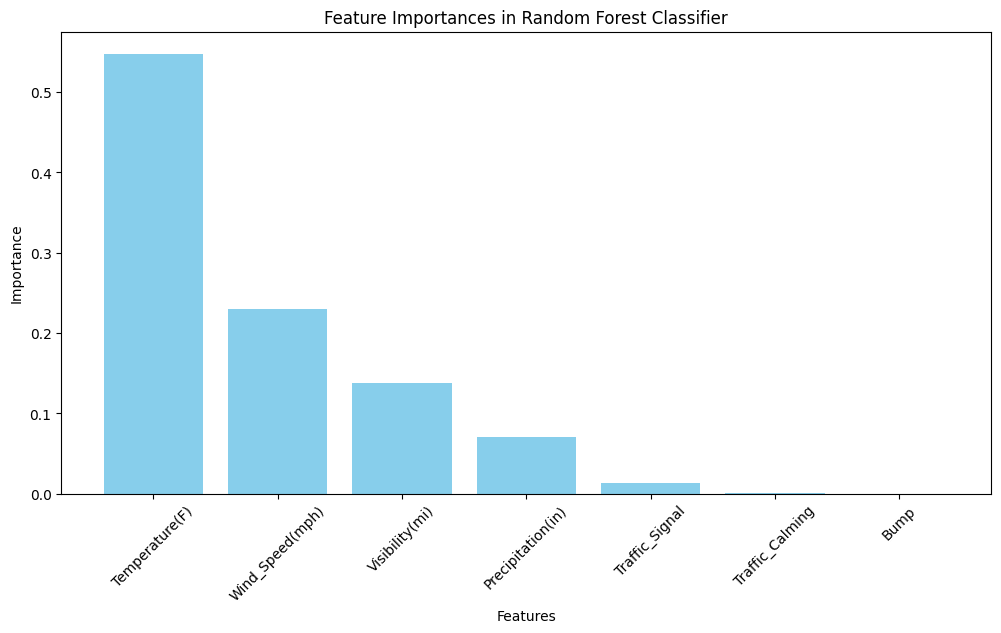

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Assuming df is already defined
# df = pd.read_csv('path_to_your_file.csv')

# Chọn các cột đặc trưng và cột mục tiêu từ DataFrame
dataset = df[["Severity", "Visibility(mi)", "Temperature(F)", "Wind_Speed(mph)", "Precipitation(in)", "Bump", "Traffic_Calming", "Traffic_Signal"]]

# Chia dataset thành X và y
X = dataset[["Visibility(mi)", "Temperature(F)", "Wind_Speed(mph)", "Precipitation(in)", "Bump", "Traffic_Calming", "Traffic_Signal"]]
y = dataset["Severity"]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# Chuẩn hóa các đặc trưng nếu cần (ví dụ cho RandomForestClassifier)
sc_X = StandardScaler()
X_train_rf = sc_X.fit_transform(X_train)
X_test_rf = sc_X.transform(X_test)

# Định nghĩa và huấn luyện mô hình RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train_rf, y_train)

# Dự đoán kết quả trên tập kiểm tra cho RandomForestClassifier
y_pred_rf = rf_classifier.predict(X_test_rf)

# Đánh giá mô hình RandomForestClassifier
rf_cm = confusion_matrix(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# In kết quả RandomForestClassifier
print("Random Forest Classifier:")
print("Confusion Matrix:\n", rf_cm)
print("F1 Score:", rf_f1)
print("Accuracy Score:", rf_accuracy)
print("\n")

# Plot feature importances for RandomForestClassifier
feature_importances = rf_classifier.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Classifier')
plt.xticks(rotation=45)
plt.show()


Random Forest Classifier:
Confusion Matrix:
 [[4130    8]
 [ 111    0]]
F1 Score: 0.9600450486851003
Accuracy Score: 0.9719934102141681


Decision Tree Classifier:
Confusion Matrix:
 [[4098   40]
 [ 110    1]]
F1 Score: 0.9567167733982425
Accuracy Score: 0.9646975759002118


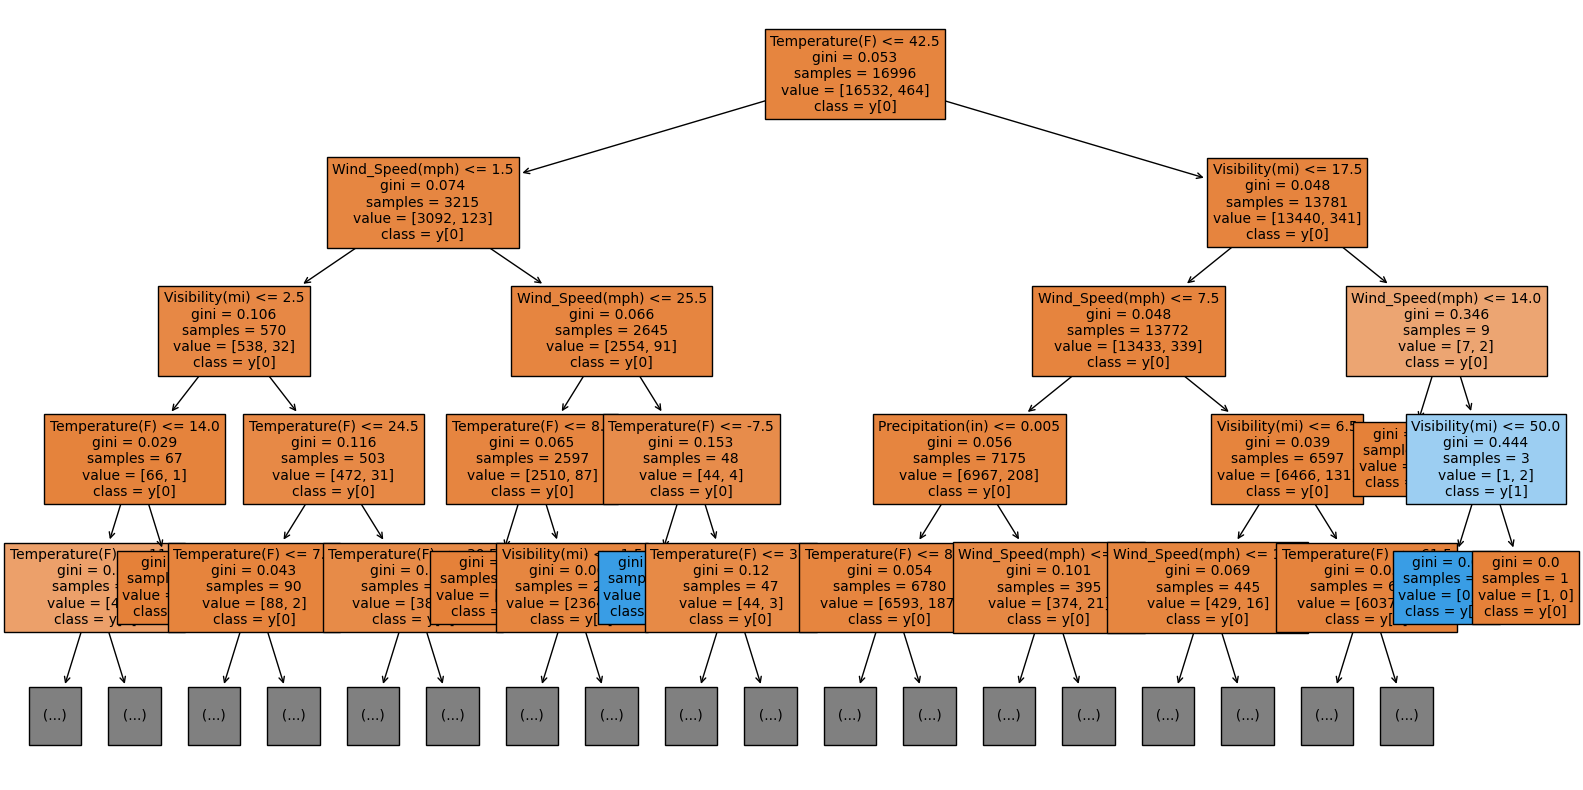

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score


# Chọn các cột đặc trưng và cột mục tiêu từ DataFrame
dataset = df[["Severity", "Visibility(mi)", "Temperature(F)", "Wind_Speed(mph)", "Precipitation(in)", "Bump", "Traffic_Calming", "Traffic_Signal"]]

# Chia dataset thành X và y
X = dataset[["Visibility(mi)", "Temperature(F)", "Wind_Speed(mph)", "Precipitation(in)", "Bump", "Traffic_Calming", "Traffic_Signal"]]
y = dataset["Severity"]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# Chuẩn hóa các đặc trưng nếu cần (ví dụ cho RandomForestClassifier)
sc_X = StandardScaler()
X_train_rf = sc_X.fit_transform(X_train)
X_test_rf = sc_X.transform(X_test)

# Định nghĩa và huấn luyện mô hình RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train_rf, y_train)

# Dự đoán kết quả trên tập kiểm tra cho RandomForestClassifier
y_pred_rf = rf_classifier.predict(X_test_rf)


# Đánh giá mô hình RandomForestClassifier
rf_cm = confusion_matrix(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
rf_accuracy = accuracy_score(y_test, y_pred_rf)


# In kết quả
print("Random Forest Classifier:")
print("Confusion Matrix:\n", rf_cm)
print("F1 Score:", rf_f1)
print("Accuracy Score:", rf_accuracy)
print("\n")



In [ ]:
y_pred_rf

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
# Tạo DataFrame chứa X_test, y_test và y_pred
X_test_rf_df = pd.DataFrame(X_test, columns=["Visibility(mi)", "Temperature(F)", "Wind_Speed(mph)", "Precipitation(in)", "Bump", "Traffic_Calming", "Traffic_Signal"])
y_test_rf_df = pd.DataFrame(y_test.reset_index(drop=True), columns=["Actual_Severity"])  # Reset index to avoid merge issues
y_pred_rf_df = pd.DataFrame(y_pred_rf, columns=["Predicted_Severity"])

# Concatenate X_test, y_test, and y_pred DataFrames into a single DataFrame
result_df_rf = pd.concat([X_test_rf_df, y_test_rf_df, y_pred_rf_df], axis=1)

# Export the DataFrame to a CSV file
result_df_rf.to_csv('predicted_results_random_forest.csv', index=False)